In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'CLASSES/SP20/ece228/Project/Code/Networks/ResNet/doe_2_5_29/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
%matplotlib inline

list_of_files = os.listdir(base_dir)

In [11]:
base_dir

'/content/gdrive/My Drive/CLASSES/SP20/ece228/Project/Code/Networks/ResNet/doe_2_5_29/'

In [0]:
entry = torch.load(base_dir + list_of_files[0])

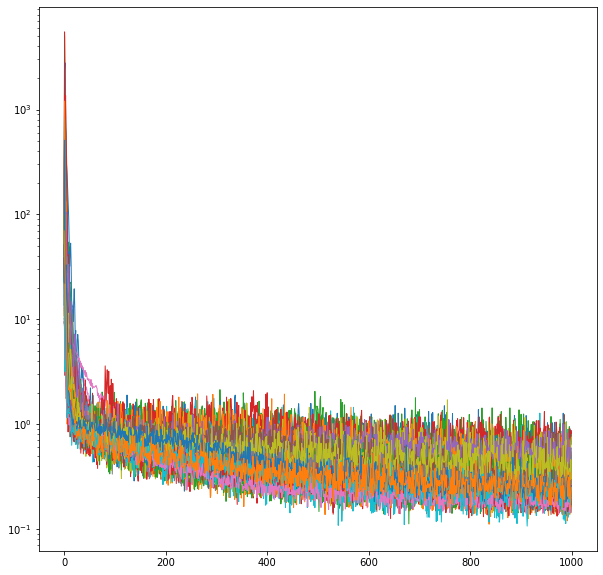

In [4]:
plt.figure(figsize = (10,10))
for i in range(100):
  try:
    entry = torch.load(base_dir + list_of_files[i])
    plt.plot(entry['tr_loss'][:1000],linewidth=1)
  except:
    pass


plt.yscale('log')
# plt.xlim((0,1000))
plt.show()


In [0]:
batch = []
lr = []
num_channels = []
ave_loss_last_hundred = []
for i in range(len(list_of_files)):
    entry = torch.load(base_dir + list_of_files[i])
    ave_loss_last_hundred.extend([np.mean(entry['tr_loss'][:1000][-100:])])
    lr.extend([entry['lr']])
    batch.extend([entry['batch_size']])
    num_channels.extend([entry['num_channels']])


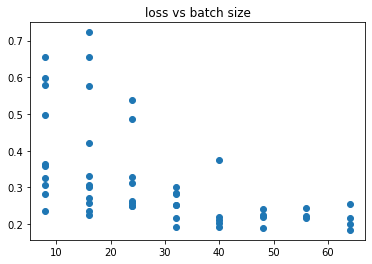

In [6]:
plt.scatter(batch,ave_loss_last_hundred)
plt.title('loss vs batch size')
plt.show()

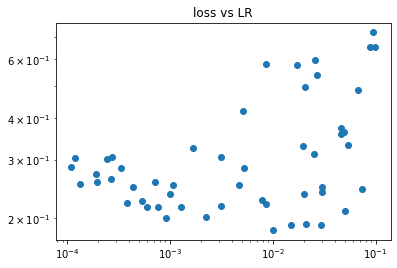

In [7]:
plt.scatter(lr,ave_loss_last_hundred)
plt.xscale('log')
plt.yscale('log')
plt.title('loss vs LR')
plt.show()

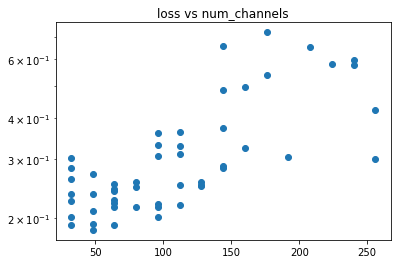

In [9]:
plt.scatter(num_channels,ave_loss_last_hundred)
plt.yscale('log')
plt.title('loss vs num_channels')
plt.show()

In [0]:
sort_ind = np.argsort(ave_loss_last_hundred)
sorted_loss = [ave_loss_last_hundred[sort_ind[i]] for i in range(20)]
sorted_lr   = [lr[sort_ind[i]] for i in range(20)]
sorted_batch = [batch[sort_ind[i]] for i in range(20)]
sorted_channels = [num_channels[sort_ind[i]] for i in range(20)]
# lr_sorted = lr[sort_ind]

In [11]:
for i in range(20):
  print(sorted_lr[i],sorted_batch[i],sorted_channels[i])

0.010037280423135009 64 48
0.015083493667219106 48 64
0.02915253251637771 32 32
0.021036237853248308 40 48
0.0009134560082427927 64 32
0.002253151992642363 40 96
0.05013348686508085 40 48
0.0012792453334031586 64 64
0.000755411949170941 56 80
0.0005931569004088661 32 96
0.0031499630024796094 48 112
0.008583950376912236 40 96
0.00037862257072075674 56 64
0.0005369982986820667 48 32
0.007895053438134264 16 64
0.020178798009067505 8 48
0.00100353237150942 16 32
0.029779273539724233 48 64
0.07392279989710923 56 64
0.0298302075950857 24 80


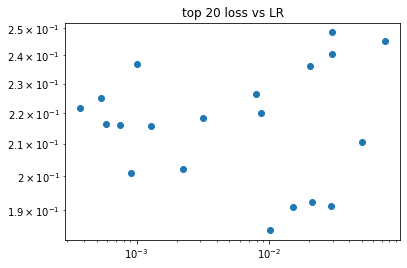

In [13]:
plt.scatter(sorted_lr,sorted_loss)
plt.xscale('log')
plt.yscale('log')
plt.title('top 20 loss vs LR')
plt.show()

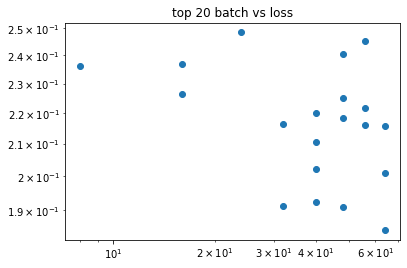

In [17]:
plt.scatter(sorted_batch,sorted_loss)
plt.xscale('log')
plt.yscale('log')
plt.title('top 20 batch vs loss')
plt.show()

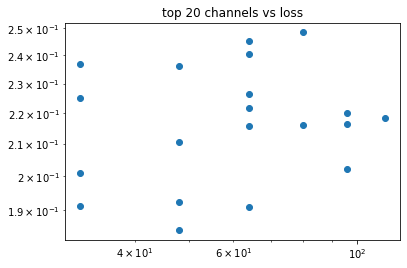

In [18]:
plt.scatter(sorted_channels,sorted_loss)
plt.xscale('log')
plt.yscale('log')
plt.title('top 20 channels vs loss')
plt.show()